# 🏦 Bank Loyalty Analyzer: Predicting Customer Churn

This notebook focuses on predicting customer churn for a bank using supervised classification techniques.  
We'll explore patterns in customer behavior, encode categorical data, train a predictive model, and interpret which features lead to customer loyalty or churn.

**Objective:** Identify customers who are likely to leave so that the bank can take proactive retention measures.

**Load Libraries**

In [1]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**Load and Explore Dataset**

In [2]:
# Load the dataset (assume churn dataset is named 'Churn_Modelling.csv')
df = pd.read_csv('Churn_Modelling.csv')

# Preview data
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


##  Dataset Overview

- **CustomerId**: Unique ID (not needed for prediction)
- **Geography, Gender**: Categorical variables
- **CreditScore**: Numeric
- **Age**: Customer's age
- **Tenure**: Years with the bank
- **Balance**: Account balance
- **NumOfProducts**: Number of bank products
- **HasCrCard, IsActiveMember**: Binary
- **EstimatedSalary**: Monthly salary
- **Exited**: Target variable (1 = churned, 0 = loyal)

**Clean Data**

In [3]:
# Drop useless columns
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

# Check nulls
print(df.isnull().sum())

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


**Encode Categorical Variables**

In [4]:
# Label encode Gender
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# One-hot encode Geography (more than 2 categories)
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

# Preview cleaned data
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


**Exploratory Data Analysis (EDA)**

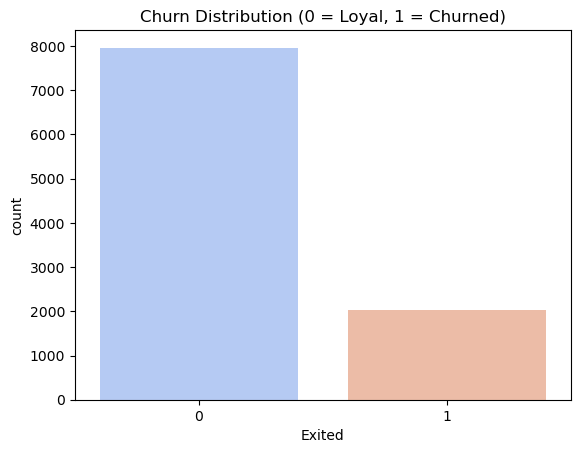

In [5]:
# Churn Distribution
sns.countplot(data=df, x='Exited', palette='coolwarm')
plt.title('Churn Distribution (0 = Loyal, 1 = Churned)')
plt.show()

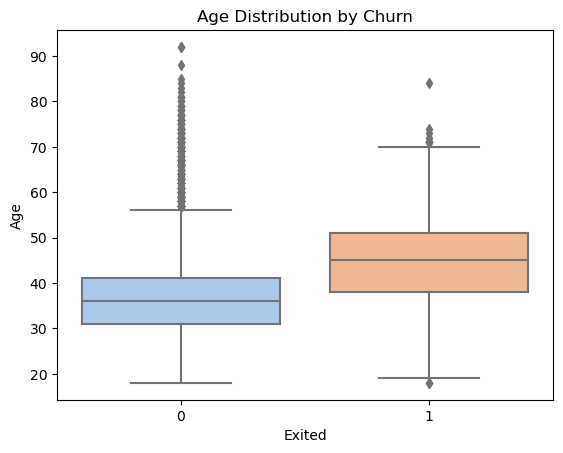

In [6]:
# Age vs Churn
sns.boxplot(data=df, x='Exited', y='Age', palette='pastel')
plt.title('Age Distribution by Churn')
plt.show()

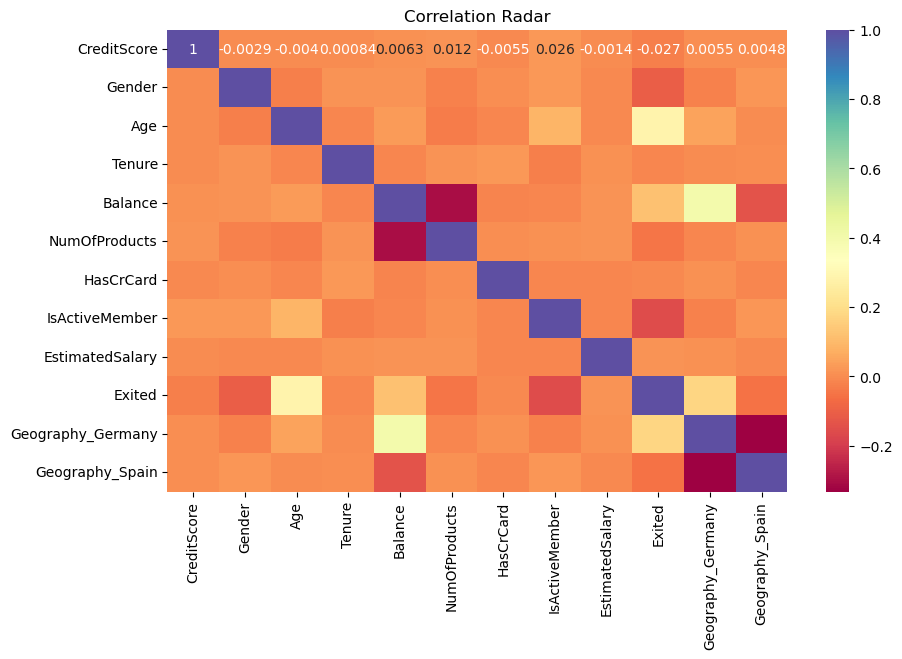

In [7]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='Spectral')
plt.title('Correlation Radar')
plt.show()

**Feature/Target Split**

In [8]:
X = df.drop('Exited', axis=1)
y = df['Exited']

**Train/Test Split**

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Train Model (Random Forest)**

In [10]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

**Evaluate Model**

In [11]:
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

 Accuracy: 0.866

 Confusion Matrix:
 [[1552   55]
 [ 213  180]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.46      0.57       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



**Feature Importance**

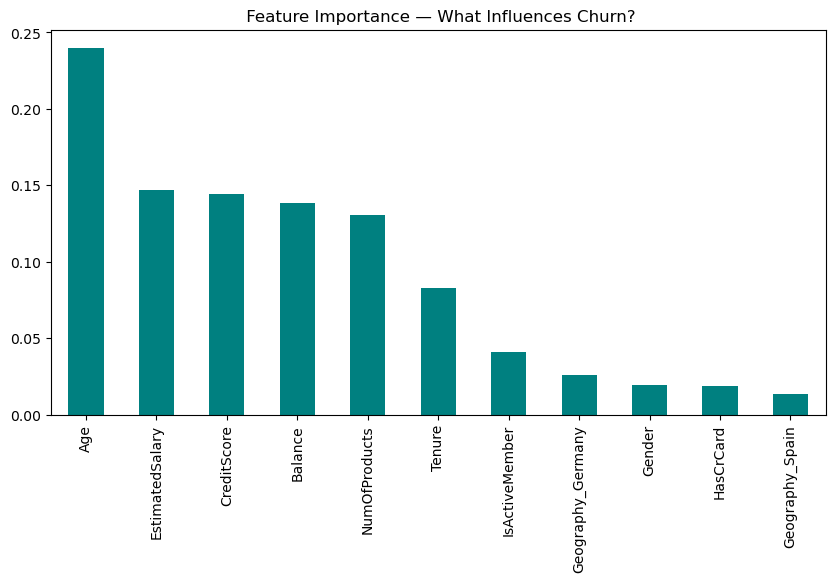

In [12]:
# Plot feature importance
feat_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', figsize=(10,5), color='teal')
plt.title(" Feature Importance — What Influences Churn?")
plt.show()

##  Conclusion

- **Accuracy Achieved**: 87%  
- Most important churn indicators:
  - Age    
  - EstimatedSalary          
  - CreditScore  
  - Balance       
  - NumOfProducts
  - Tenure
  - IsActiveMember      
  - Geography_Germany
  - Gender                    
  - HasCrCard          
   - Geography_Spain

The model shows strong performance and could help retention teams focus on high-risk customers.